## Logistic Regression 개념 

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [4]:
customer = pd.read_csv("data/customerChurn.csv")

In [5]:
customer.head()

,sex,age,Recency,Frequency,Monetary,Churn
0,M,11,4,41,1268981,No
1,M,10,18,15,843996,No
2,F,38,16,41,1755623,No
3,M,13,8,14,862172,No
4,F,20,22,42,748430,No


In [12]:
X = customer[['Frequency']]
y = (customer["Churn"] == 'Yes').astype(np.int) # Yes면 1 No 면 0

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
X.describe()

,Frequency
count,5000.000000
mean,19.375200
std,13.256922
min,2.000000
25%,9.000000
50%,16.000000
75%,28.000000
max,50.000000


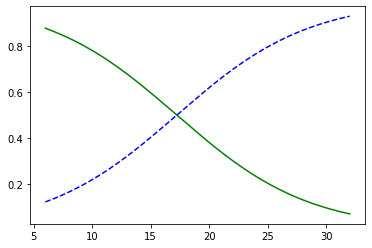

In [16]:
X_new = np.linspace(6,32,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Yes")
plt.plot(X_new, y_proba[:,0], "b--", label="No")

In [79]:
X = customer[['Frequency','Recency']]
y = (customer["Churn"] == 'Yes').astype(np.int) # Yes면 1 No 면 0

In [80]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/Users/fastbat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Purchase Recency')

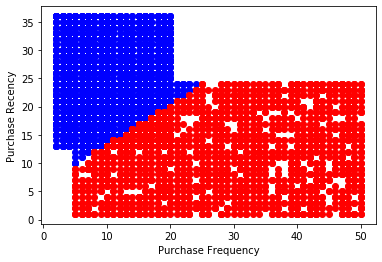

In [81]:
y_predict = log_reg.predict(X)
X['predict'] = y_predict
X_1 = X[X['predict']==1].copy()
X_0 = X[X['predict']==0].copy()
plt.plot(X_1['Frequency'], X_1['Recency'], 'bo')
plt.plot(X_0['Frequency'], X_0['Recency'], 'ro')
plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Recency')

## 계수값 확인 

In [84]:
import statsmodels.api as sm

X = customer[['Frequency','Recency','Monetary']]
y = (customer["Churn"] == 'Yes').astype(np.int)

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.146362
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.789    
Dependent Variable: Churn            AIC:              1469.6236
Date:               2020-08-18 19:45 BIC:              1489.1752
No. Observations:   5000             Log-Likelihood:   -731.81  
Df Model:           2                LL-Null:          -3465.7  
Df Residuals:       4997             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Frequency   -0.1721    0.0086  -19.9131  0.0000  -0.1890  -0.1551
Recency      0.3118    0.0112   27.9123  0.0000   0.2899   0.3337
Monetary

## 로지스틱 회귀분석 성과 측정

In [85]:
from sklearn.model_selection import train_test_split

X = customer[['Frequency','Recency']]
y = (customer["Churn"] == 'Yes').astype(np.int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

log_reg = LogisticRegression().fit(X_train, y_train)

print("학습 집합 정확도: {:.3f}".format(log_reg.score(X_train, y_train)))
print("테스트 집합 정확도: {:.3f}".format(log_reg.score(X_test, y_test)))

학습 집합 정확도: 0.874
테스트 집합 정확도: 0.867


### 다항 로지스틱스 회귀 (소프트맥스 회귀)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

telecom = pd.read_csv("data/telecom.csv")

In [2]:
telecom.head()

,ID,LONGDIST,International,LOCAL,DROPPED,PAY_MTHD,LocalBillType,LongDistanceBillType,AGE,SEX,STATUS,CHILDREN,Est_Income,Car_Owner,CHURNED
0,0,5.24640,7.51510,86.32780,0,CH,FreeLocal,Standard,57,F,M,2,27535.3,Y,Vol
1,3,0.00000,0.00000,3.94229,0,CC,Budget,Intnl_discount,50,F,S,2,64632.3,N,InVol
2,4,5.55564,0.00000,9.36347,1,CC,Budget,Intnl_discount,68,F,M,2,81000.9,N,Vol
3,8,14.01930,5.68043,29.80650,0,CC,Budget,Standard,34,M,S,0,87467.1,Y,Current
4,10,13.66400,2.95642,32.63810,0,CC,FreeLocal,Intnl_discount,60,M,M,2,83220.6,N,Vol


In [4]:
X = telecom.iloc[:,np.r_[1,2,3,4,8,11,12]]
y = telecom["CHURNED"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
softmax_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_prob = softmax_reg.predict_proba(X_test)

In [9]:
y_prob

array([[5.85838875e-01, 1.50662954e-03, 4.12654496e-01],
       [6.20270645e-01, 1.11468999e-05, 3.79718208e-01],
       [5.62024809e-01, 6.41346044e-08, 4.37975127e-01],
       ...,
       [5.93971903e-01, 7.26512607e-07, 4.06027371e-01],
       [7.75816291e-01, 8.84208664e-74, 2.24183709e-01],
       [7.06959497e-01, 1.35510844e-08, 2.93040489e-01]])

In [10]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_p = lb.fit_transform(y_test)

In [12]:
y_p

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [22]:
from sklearn.metrics import log_loss
log_loss(y_p, y_prob)

0.6524520018670018

In [28]:
softmax_reg.score(X_test,y_test)

0.6702702702702703

### 분류 성과 측정 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

customer = pd.read_csv("data/customerChurn.csv")

X = customer[['Frequency','Recency','Monetary']]
y = (customer["Churn"] == 'Yes').astype(np.int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

log_reg = LogisticRegression().fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[692,  58],
       [ 33, 717]])

In [2]:
print("테스트 집합 정확도: {:.3f}".format(log_reg.score(X_test, y_test)))

from sklearn.metrics import accuracy_score

print("테스트 집합 accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))

테스트 집합 정확도: 0.939
테스트 집합 accuracy: 0.939


In [3]:
from sklearn.metrics import precision_score

print("테스트 집합 정밀도: {:.3f}".format(precision_score(y_test, y_pred)))

테스트 집합 정밀도: 0.925


In [4]:
from sklearn.metrics import recall_score

print("테스트 집합 재현율: {:.3f}".format(recall_score(y_test, y_pred)))

테스트 집합 재현율: 0.956


In [5]:
from sklearn.metrics import f1_score

print("테스트 집합 f1 점수: {:.3f}".format(f1_score(y_test, y_pred)))

테스트 집합 f1 점수: 0.940


In [6]:
y_score = log_reg.predict_proba(X_test)
y_score[:,1]

array([9.93683907e-01, 9.96035983e-01, 3.98510330e-05, ...,
       9.69351460e-01, 9.85293711e-01, 5.77449466e-03])

In [7]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_score[:,1])

# 1일 확률만 입력

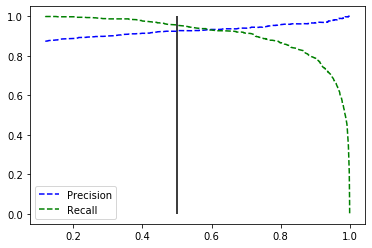

In [14]:
def plot_precision_recall_vs_threshold(precisions, recalls, threholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.vlines(x=0.5,ymin=0,ymax=1)
    plt.legend(loc='best')
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### ROC 곡선

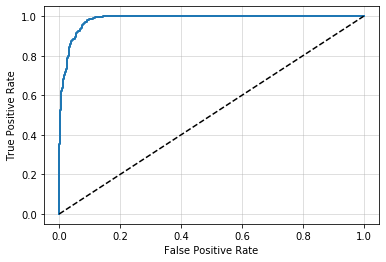

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([[0],[1]], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(which='major', axis='both', alpha=0.5)
    
plot_roc_curve(fpr, tpr)
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

print("테스트 집합 AUC 점수: {:.3f}".format(roc_auc_score(y_test, y_pred)))

테스트 집합 f1 점수: 0.939


### 연습문제

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [41]:
gc = pd.read_csv('data/GermanCredit.csv')

gc.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETIRING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,True
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,False
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,True
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,True
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,False


- OBS : 관찰번호 
- CHK_ACCT : (범주형) 체크 계좌 상태 (0: < 0 DM, 1: 0 < ... < 200 DM, 2: => 200 DM, 3: No checking account) # DM은 eur로 통합되기 전의 독일의 화폐단위 Deutsche Mark를 뜻함
- DURATION : (수치형) 신용 대출 기간(개월)
- HISTORY : (범주형) 신용 거래 내역 (0: 신용 거래 내역 없음, 1: 우리 은행의 신용 대출 모두 갚음, 2: 모든 은행의 신용 대출 모두 갚음, 3: 연체 이력 있음, 4: 유의 계좌)
- NEW_CAR: (범주형) 신용 대출의 목적이 신차 구입인 경우 (0: No, 1: Yes)
- USED_CAR: (범주형) 신용 대출의 목적이 중고차 구입인 경우 (0: No, 1: Yes)
- FURNITURE: (범주형) 신용 대출의 목적이 가구 구입인 경우 (0: No, 1: Yes)
- RADIO/TV: (범주형) 신용 대출의 목적이 RADIO 또는 TV 구입인 경우 (0: No, 1: Yes)
- EDUCATION: (범주형) 신용 대출의 목적이 학자금 관련인 경우 (0: No, 1: Yes)
- RETRAINING: (범주형) 신용 대출의 목적이 재취업 목적인 경우 (0: No, 1: Yes)
- AMOUNT: (수치형) 신용 대출 금액 
- SAV_ACCT: (범주형) 저축 계좌 상태 (0: < 100DM, 1: 100<= ... <500DM, 2: 500<= ... <1000DM, 3: => 1000DM, 4: Unknown/No savings account)
- EMPLOYMENT: (범주형) 현재 취업 상태 (0: 무직, 1: < 1년, 2: 1<= ... < 4년, 3: 4<= ... < 7년, 4: >= 7년)
- INSTALL_RATE: (수치형) 가처분 소득대비 상환금액 비율
- MALE_DIV: (범주형) 남성이며 이혼상태인 경우 (0: No, 1: Yes)
- MALE_SINGLE: (범주형) 남성이며 싱글인 경우 (0: No, 1: Yes)
- MALE_MAR_WID: (범주형) 남성이며 혼인한 경우 또는 홀아비 (0: No, 1: Yes)
- CO-APPLICANT: (범주형) 공동신청자가 있는 경우 (0: No, 1: Yes)
- GUARANTOR: (범주형) 보증인이 있는 경우  (0: No, 1: Yes)
- PRESENT_RESIDENT: (범주형) 현재 주소지 주거 경력 (0: <= 1년, 1: 1<= ... <= 2년, 2: 2<= ... <= 3년, 3: > 4년)
- REAL_ESTATE: (범주형) 부동산 보유 여부 (0: No, 1: Yes)
- PROP_UNKN_NONE: (범주형) 재산을 보유하지 않은 경우 (0: No, 1: Yes)
- AGE: (수치형) 나이
- OTHER_INSTALL: (범주형) 다른 신용대출 보유 여부 (0: No, 1: Yes)
- RENT: (범주형) 주택 임대 여부 (0: No, 1: Yes)
- OWN_RES: (범주형) 자가 주택 보유 여부 (0: No, 1: Yes)
- NUM_CREDITS: (수치형) 기존 신용대출 수
- JOB: (범주형) (0: 비숙련공 계약직, 1: 비숙련공 정규직, 2: 숙련공/사무직, 3: 관리직/자영업/기술직)
- NUM_DEPENDENTS: (수치형) 가족의 수 
- TELEPHONE: (범주형) 전화보유 여부 (0: No, 1: Yes)
- FOREIGN: (범주형) 외국인 노동자 여부 (0: No, 1: Yes)
- RESPONSE: (범주형) 신용도가 좋음 (0: No, 1: Yes)

### RESPONSE가 종속변수이며, 독립변수는 수치형과 이분형 범주형 변수 중에서 선발. 여러 범주를 갖는 범주형 변수의 사용방안은 나중에 OneHotEncoding을 학습한 이후에 활용예정

In [47]:
X = gc.iloc[:,np.r_[2,4:11,13:19,20:27,28:31]]  # np.r_ 은 비연속적으로 컬럼을 선택할 때 활용 
y = gc['RESPONSE']

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
DURATION           1000 non-null int64
NEW_CAR            1000 non-null int64
USED_CAR           1000 non-null int64
FURNITURE          1000 non-null int64
RADIO/TV           1000 non-null int64
EDUCATION          1000 non-null int64
RETIRING           1000 non-null int64
AMOUNT             1000 non-null int64
INSTALL_RATE       1000 non-null int64
MALE_DIV           1000 non-null int64
MALE_SINGLE        1000 non-null int64
MALE_MAR_or_WID    1000 non-null int64
CO-APPLICANT       1000 non-null int64
GUARANTOR          1000 non-null int64
REAL_ESTATE        1000 non-null int64
PROP_UNKN_NONE     1000 non-null int64
AGE                1000 non-null int64
OTHER_INSTALL      1000 non-null int64
RENT               1000 non-null int64
OWN_RES            1000 non-null int64
NUM_CREDITS        1000 non-null int64
NUM_DEPENDENTS     1000 non-null int64
TELEPHONE          1000 non-null int

### 독립변수 후보들과 종속변수간의 관계 탐색, 종속변수가 범주형이므로 범주에 따른 독립변수 후보들의 값의 분포에 차이가 있는 지 검토

- DURATION과 RESPONSE

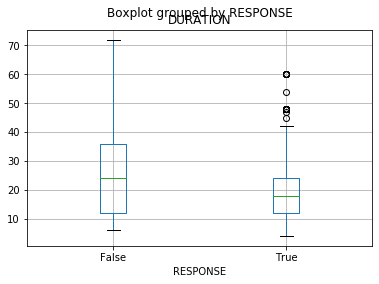

In [50]:
gc.boxplot(column=['DURATION'], by="RESPONSE") # RESPONSE 값에 따른 DURATION 분포 차이가 보임 

- AMOUNT와 RESPONSE

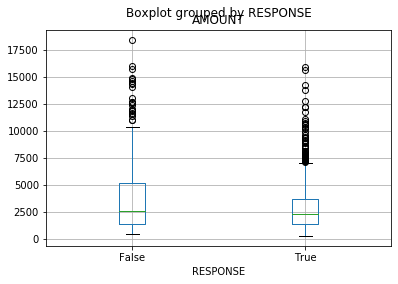

In [79]:
gc.boxplot(column=['AMOUNT'], by="RESPONSE") 
# RESPONSE 값에 따른 AMOUNT 분포는 중앙값은 비슷하지만 신용도가 좋지 않은 그룹이 더 많은 금액을 신청하였음

- INSTALL_RATE과 RESPONSE

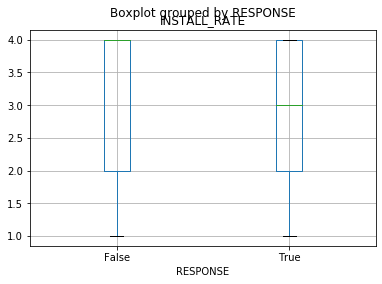

In [81]:
gc.boxplot(column=['INSTALL_RATE'], by="RESPONSE") 

# INSTALL_RATE 값의 범위가 RESPONSE에 따라 상이해 보이지 않음. 중앙값은 차이가 보임.

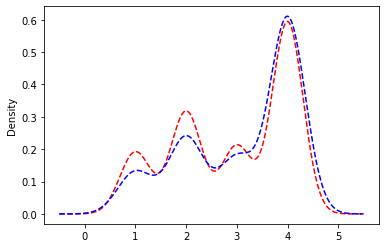

In [90]:
gcYES = gc[gc.RESPONSE == True]
gcNO = gc[gc.RESPONSE == False]

gcYES['INSTALL_RATE'].plot(kind='kde', style='r--') 
gcNO['INSTALL_RATE'].plot(kind='kde', style='b--') 

## 신용도가 좋지 않은 신청자들의 INSTALL_RATE 값이 좀 더 높은 경향

- NEW_CAR와 RESPONSE

In [53]:
counts = pd.crosstab(gc.RESPONSE, gc.NEW_CAR)
counts

NEW_CAR,0,1
RESPONSE,,
False,211,89
True,555,145


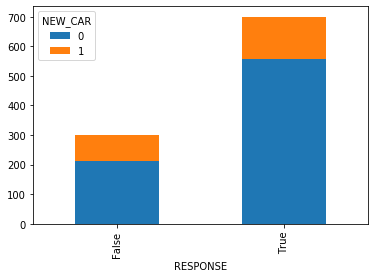

In [54]:
counts.plot(kind='bar', stacked=True)

In [73]:
counts[1][0] / (counts[0][0] + counts[1][0]) # FALSE 일때 신차 구매 비율

0.2966666666666667

In [74]:
counts[1][1] / (counts[0][1] + counts[1][1]) # TRUE 일때 신차 구매 비율 

0.20714285714285716

- USED_CAR와 RESPONSE

In [75]:
counts = pd.crosstab(gc.RESPONSE, gc.USED_CAR)
counts

USED_CAR,0,1
RESPONSE,,
False,283,17
True,614,86


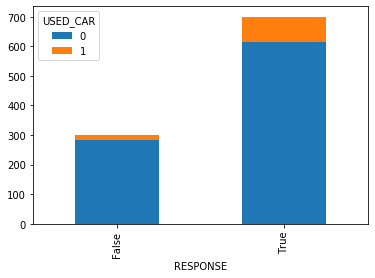

In [76]:
counts.plot(kind='bar', stacked=True)

In [77]:
counts[1][0] / (counts[0][0] + counts[1][0]) # FALSE 일때 중고차 구매 비율

0.056666666666666664

In [78]:
counts[1][1] / (counts[0][1] + counts[1][1]) # TRUE 일때 중고차 구매 비율 

0.12285714285714286

- FOREIGN과 RESPONSE

In [96]:
counts = pd.crosstab(gc.RESPONSE, gc.FOREIGN)
counts

FOREIGN,0,1
RESPONSE,,
False,296,4
True,667,33


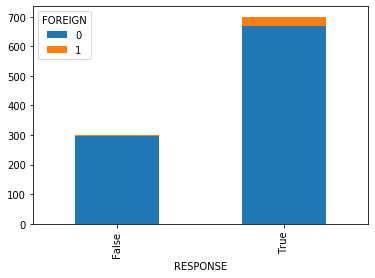

In [97]:
counts.plot(kind='bar', stacked=True)

In [98]:
counts[1][0] / (counts[0][0] + counts[1][0]) # FALSE 일때 FOREIGN 비율

0.013333333333333334

In [99]:
counts[1][1] / (counts[0][1] + counts[1][1]) # TRUE 일때 FOREIGN 비율 

0.047142857142857146

### 모형 학습 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [101]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
print("Predictions: {}".format(clf.predict(X_test)))

Predictions: [ True  True  True  True  True False False  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True False  True False  True  True
 False  True  True  True  True  True  True  True  True False False  True
  True  True  True  True  True  True False  True  True  True  True False
  True  True  True  True False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False  

In [103]:
print("Predictions: {}".format(clf.predict_proba(X_test)))

Predictions: [[0.33902693 0.66097307]
 [0.32599804 0.67400196]
 [0.20815147 0.79184853]
 [0.46994886 0.53005114]
 [0.12871347 0.87128653]
 [0.60637753 0.39362247]
 [0.61414795 0.38585205]
 [0.24159308 0.75840692]
 [0.20261108 0.79738892]
 [0.33699776 0.66300224]
 [0.4064295  0.5935705 ]
 [0.31668453 0.68331547]
 [0.15325537 0.84674463]
 [0.36677136 0.63322864]
 [0.48233839 0.51766161]
 [0.69564002 0.30435998]
 [0.25162165 0.74837835]
 [0.25737018 0.74262982]
 [0.42884382 0.57115618]
 [0.23396639 0.76603361]
 [0.2912505  0.7087495 ]
 [0.36586609 0.63413391]
 [0.16918801 0.83081199]
 [0.73166693 0.26833307]
 [0.24820044 0.75179956]
 [0.28297201 0.71702799]
 [0.35402909 0.64597091]
 [0.06737437 0.93262563]
 [0.38994662 0.61005338]
 [0.30668069 0.69331931]
 [0.15735891 0.84264109]
 [0.48792472 0.51207528]
 [0.35276243 0.64723757]
 [0.46469913 0.53530087]
 [0.2820967  0.7179033 ]
 [0.67357285 0.32642715]
 [0.05110852 0.94889148]
 [0.48990173 0.51009827]
 [0.18586724 0.81413276]
 [0.13265108

### 분류 성과 측정

In [104]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 24,  56],
       [  8, 162]])

In [105]:
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.744


In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision_score(y_test, y_pred)

0.7431192660550459

In [108]:
recall_score(y_test,y_pred)

0.9529411764705882

In [109]:
f1_score(y_test,y_pred)

0.8350515463917525

In [110]:
roc_auc_score(y_test,y_pred)

0.6264705882352941

In [118]:
clf_cv = LogisticRegression(max_iter=500)

scores = cross_val_score(clf_cv, X, y, scoring='roc_auc', cv=5)
scores

array([0.6722619 , 0.72607143, 0.70809524, 0.7372619 , 0.69595238])

In [119]:
scores.mean()

0.7079285714285715